# **MIDTERM AND FINAL REPORT**

DATA ANALYSIS AND VISUALIZATION

*Members - Vu Thanh Dat(523V0015) & Pai Hein Kyaw(523K0078)*

**Abstract**

This analysis explores factors influencing student exam performance using a synthetic student dataset containing academic, behavioral, and socio-economic features. The study includes data cleaning, descriptive statistics, correlation analysis, and visualization techniques such as distribution plots and a correlation heatmap to identify meaningful patterns. Statistical testing is conducted using one-way and two-way ANOVA to examine whether categorical variables create significant differences in exam scores. The results highlight that attendance, hours studied, previous scores, and tutoring sessions show the strongest positive associations with exam performance, while most background factors demonstrate weak or negligible influence.

**Dataset**

https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

# **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import lognorm, norm, poisson, expon, stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# **1. Exploratory Data Analysis (EDA)**

In [ ]:
df = pd.read_csv("StudentPerformanceFactors.csv")

df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **a. Summarize the dataset information:**

*   Check the number of records, number of variables, and data types of each variable.

Firstly, we will check the numbers of rows and features(columns)

In [ ]:
df.shape

(6607, 20)

As you can see, our dataset have 20 features with 6607 rows. The names and the types of the features are as follow:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

For the next step, we will check and find the null value for each feature to know if there are some empty records.

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


After checking the null values, we found that there is 78, 90 and 67 null values in **Teacher_Quality**, **Parental_Education_Level** and **Distance_from_Home** respectively. Although it's normal that we found this kind of null values in the dataset with large records, we will handle that filling the most frequent in each null-valued field.

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']] = imputer.fit_transform(df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']])

df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


By using this technique of filling "NA", there is not any null value in our dataset anymore.

Then, we will check if there is any duplicated values in each row.

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6602,False
6603,False
6604,False
6605,False


According to the output, there are unique values for every record in the dataset beacuse it shows that there is no duplicatied value.

# **b. Descriptive statistical analysis:**

In this section, summary statistics are generated to understand the central tendencies and distribution of key numerical variables in the dataset. Measures such as mean, median, standard deviation, and quartiles help reveal the general study habits, academic background, and performance patterns of the students.


In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


The summary statistics indicate that students generally study around 20 hours per week, maintain high attendance, and achieve exam scores clustered around the mid-60s, with moderate variation across variables.

# Scatter plot

We're going to examine how student performance is visualized using scatter plots. The goal is to understand the relationships between three variables: Hours Studied, Previous Scores, and the final Exam Score.

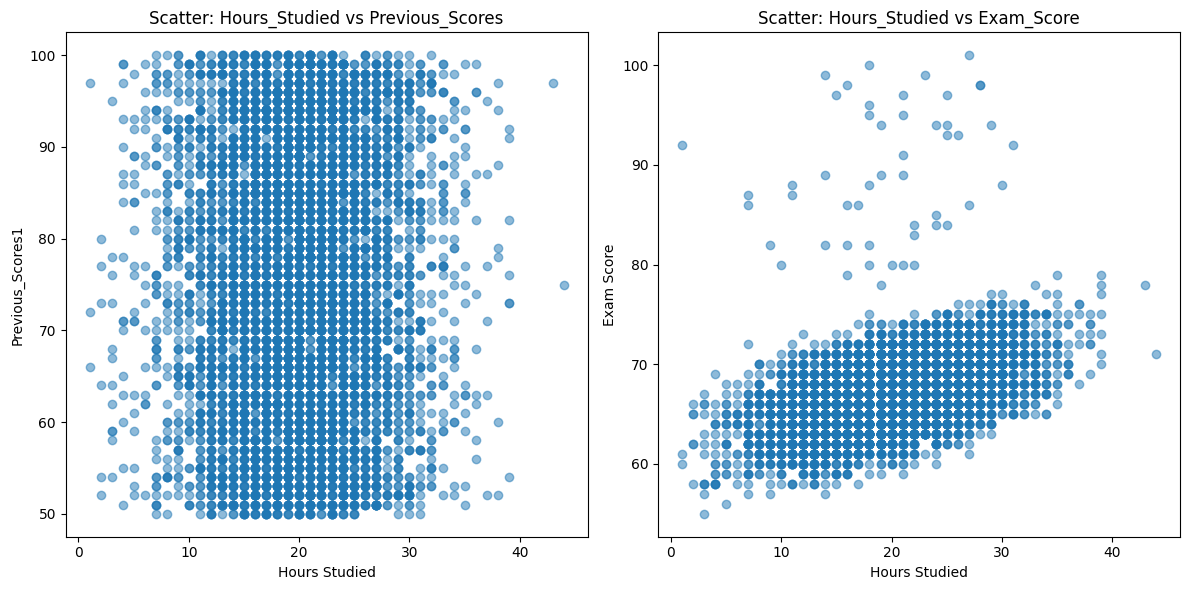

In [ ]:
scatter_df1 = df[['Hours_Studied','Previous_Scores']]
scatter_df2 = df[['Hours_Studied','Exam_Score']]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(x = 'Hours_Studied', y='Previous_Scores', data=scatter_df1, alpha= 0.5)
axes[0].set_title('Scatter: Hours_Studied vs Previous_Scores')
axes[0].set_xlabel('Hours Studied')
axes[0].set_ylabel('Previous_Scores1')

axes[1].scatter(x = 'Hours_Studied', y='Exam_Score', data=scatter_df2, alpha= 0.5)
axes[1].set_title('Scatter: Hours_Studied vs Exam_Score')
axes[1].set_xlabel('Hours Studied')
axes[1].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()

The visualizations confirm a positive correlation between Hours Studied and Exam Score but show no correlation between Hours Studied and Previous Scores.

# Line Plot

We're going to examine the relationship between student attendance percentage and the mean exam score using a line plot to visually track how performance changes with increased presence.

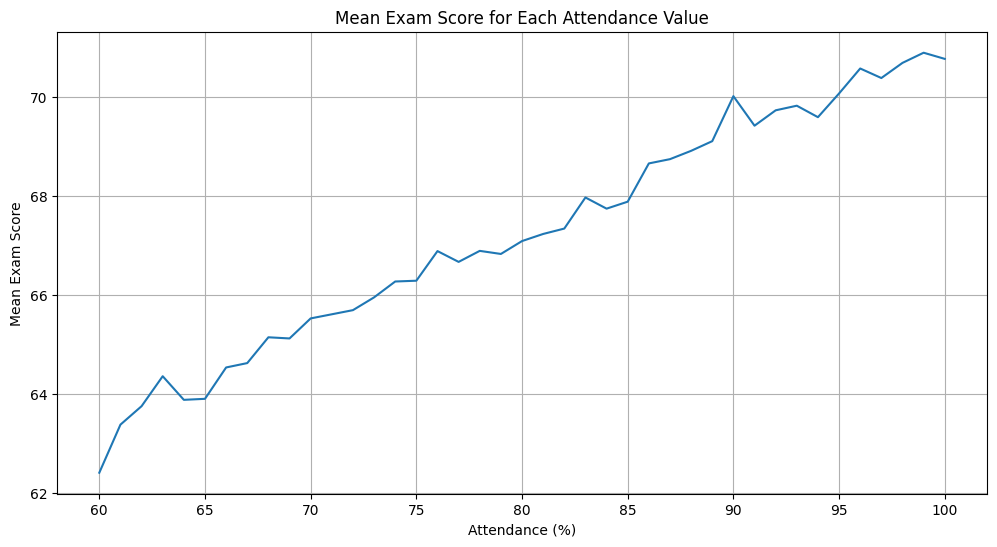

In [ ]:
# mean score data
mean_scores = df.groupby('Attendance')['Exam_Score'].mean()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(mean_scores.index, mean_scores.values)

plt.xlabel("Attendance (%)")
plt.ylabel("Mean Exam Score")
plt.title("Mean Exam Score for Each Attendance Value")
plt.grid(True)
plt.show()

There is a clear positive correlation, indicating that higher student attendance is consistently associated with a higher mean exam score.

# Pie charts

We're going to use pie charts to visualize the proportional distribution of four key demographic and behavioral variables within the student dataset: Attendance, Family Income, Parental Involvement, and Parental Education Level.

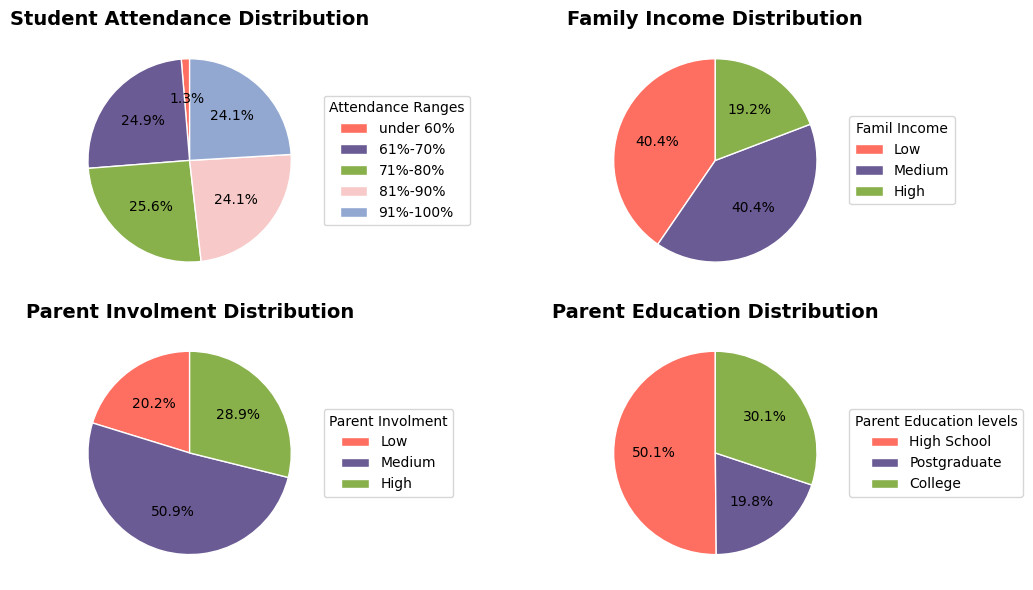

In [ ]:
# Prepare attendance data
df_att = df['Attendance']
df_att = pd.to_numeric(df_att, errors='coerce')

bins = [0, 60, 70, 80, 90, 100]
labels_att = ['under 60%', '61%-70%', '71%-80%', '81%-90%', '91%-100%']

df_att = pd.cut(df_att, bins=bins, labels=labels_att, include_lowest=True, right=True)

attendance_counts = df_att.value_counts().reindex(labels_att)

# Prepare Family Income data
df_fam_income = df['Family_Income']
labels_fam = ['Low', 'Medium', 'High']
family_income_count = df_fam_income.value_counts().reindex(labels_fam)

# Prepare Parent Involment data
labels_parent_involment = ['Low', 'Medium', 'High']
parent_involment_count = df['Parental_Involvement'].value_counts().reindex(labels_parent_involment)

# Prepare Parent education levels
labels_parent_education = ['High School', 'Postgraduate', 'College']
parent_education_count = df['Parental_Education_Level'].value_counts().reindex(labels_parent_education)

# Prepare color
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

wedges1, texts1, autotexts1 = axes[0, 0].pie(
    attendance_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'color': 'black', 'fontsize': 10},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

axes[0, 0].legend(
    wedges1,
    labels_att,
    title="Attendance Ranges",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

axes[0, 0].set_title('Student Attendance Distribution', fontsize=14, fontweight='bold')

wedges2, texts2, autotexts2 = axes[0, 1].pie(
    family_income_count,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'color': 'black', 'fontsize': 10},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

axes[0, 1].legend(
    wedges1,
    labels_fam,
    title="Famil Income",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

axes[0, 1].set_title('Family Income Distribution', fontsize=14, fontweight='bold')

wedges3, texts3, autotexts3 = axes[1, 0].pie(
    parent_involment_count,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'color': 'black', 'fontsize': 10},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

axes[1, 0].legend(
    wedges3,
    labels_parent_involment,
    title="Parent Involment",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

axes[1, 0].set_title('Parent Involment Distribution', fontsize=14, fontweight='bold')

wedges4, texts4, autotexts4 = axes[1, 1].pie(
    parent_education_count,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'color': 'black', 'fontsize': 10},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

axes[1, 1].legend(
    wedges4,
    labels_parent_education,
    title="Parent Education levels",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

axes[1, 1].set_title('Parent Education Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

The majority of students come from low-to-medium income families with a high rate of medium parental involvement and a majority of parents having an education level of High School or College.

# **c. Detect outliners**

We're going to examine the final results of the Interquartile Range (IQR) outlier detection method applied to three key numerical student performance variables: Exam Score, Hours Studied, and Tutoring Sessions. The output includes the box plot visualization and a table detailing the characteristics of the identified outliers for each variable.

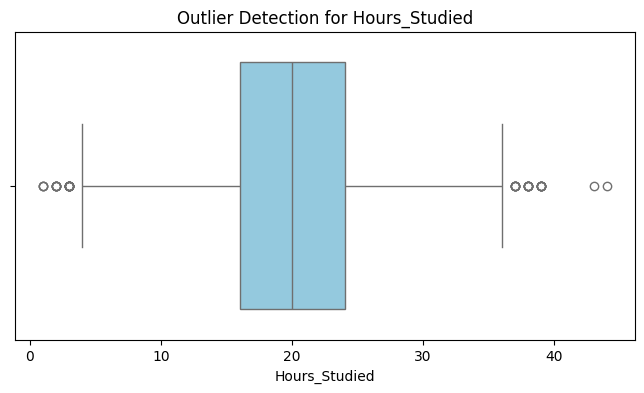

Detected 43 outlier rows based on columns: ['Hours_Studied']


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2305,39,92,Medium,Medium,No,9,73,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,Postgraduate,Moderate,Male,75
1539,3,96,High,High,Yes,9,59,Medium,Yes,2,Low,Medium,Public,Negative,3,No,College,Moderate,Female,66
2947,2,67,Medium,Medium,No,6,73,Low,Yes,1,Low,Medium,Private,Positive,2,No,College,Moderate,Male,58
3716,39,90,High,High,No,8,92,High,Yes,2,Medium,High,Private,Neutral,1,No,High School,Near,Female,78
262,1,69,High,Medium,Yes,6,97,Medium,Yes,1,Low,Medium,Public,Positive,3,No,High School,Near,Female,61


In [ ]:
def detect_outliers_iqr(df, columns, visualize=True):
    """
    Detect outliers in specified columns using the IQR method and optionally visualize them.

    Parameters:
        df (pd.DataFrame): Dataset
        columns (list or str): Column name(s) to check for outliers
        visualize (bool): If True, shows boxplots for the selected columns

    Returns:
        pd.DataFrame: Rows that contain outliers in any of the given columns
    """
    if isinstance(columns, str):
        columns = [columns]  # allow single column input

    outlier_indices = set()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find indices of outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outlier_indices.update(outliers)

            # Visualization
            if visualize:
                plt.figure(figsize=(8, 4))
                sns.boxplot(x=df[col], color='skyblue')
                plt.title(f'Outlier Detection for {col}')
                plt.xlabel(col)
                plt.show()
        else:
            print(f"Column '{col}' skipped (not numeric).")

    # Convert set to list before using .loc[]
    outlier_df = df.loc[list(outlier_indices)].copy()

    print(f"Detected {len(outlier_df)} outlier rows based on columns: {columns}")
    return outlier_df

outliers_hours = detect_outliers_iqr(df, 'Hours_Studied')

outliers_hours.head()

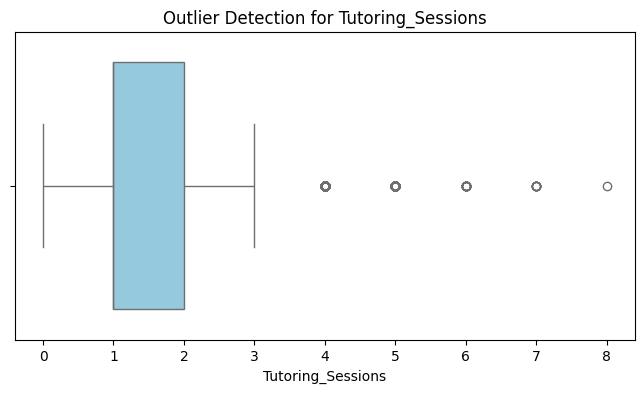

Detected 430 outlier rows based on columns: ['Tutoring_Sessions']


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
4100,11,92,High,Medium,Yes,8,82,High,Yes,4,Medium,Medium,Private,Negative,2,No,Postgraduate,Near,Female,70
2056,17,76,Medium,Low,No,7,81,Low,Yes,4,High,Medium,Private,Neutral,2,No,High School,Near,Male,65
6153,15,71,High,Low,No,6,68,Low,No,5,Low,Medium,Public,Positive,4,No,College,Near,Female,64
10,17,80,Low,High,No,8,88,Medium,No,4,Medium,High,Private,Neutral,4,No,College,Moderate,Male,68
6155,23,74,Medium,High,Yes,6,93,Medium,Yes,4,High,Medium,Private,Neutral,3,No,High School,Near,Female,70


In [ ]:
outliners_tutoring_sessions = detect_outliers_iqr(df, 'Tutoring_Sessions')

outliners_tutoring_sessions.head()

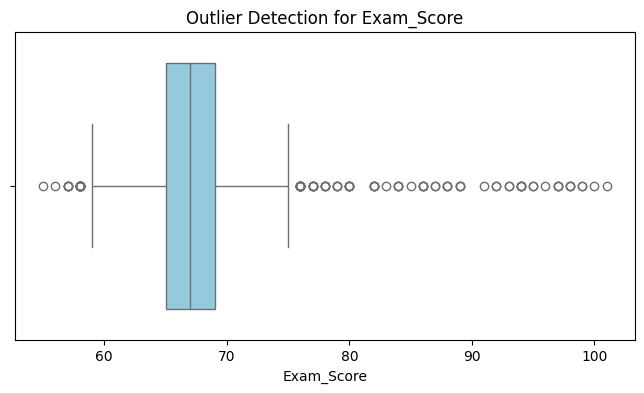

Detected 104 outlier rows based on columns: ['Exam_Score']


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
5125,16,82,Medium,Medium,No,7,56,Low,Yes,0,High,High,Private,Negative,1,Yes,High School,Far,Female,79
3593,11,64,Medium,Low,Yes,8,67,High,No,1,Medium,Medium,Public,Neutral,2,Yes,College,Near,Male,58
529,15,83,Medium,Medium,No,7,97,Medium,Yes,2,Low,High,Private,Neutral,2,No,High School,Near,Female,97
3602,32,98,Low,High,No,5,89,Medium,Yes,2,High,Low,Private,Positive,3,No,College,Near,Male,76
4635,3,60,Medium,Medium,Yes,5,76,Medium,Yes,0,Medium,High,Private,Neutral,4,No,High School,Moderate,Female,58


In [ ]:
outliners_exam_score = detect_outliers_iqr(df, 'Exam_Score')

outliners_exam_score.head()

The analysis identified distinct outlier populations: high-scoring students in 'Exam_Score', students with extreme study habits in 'Hours_Studied', and students who utilized four or more tutoring sessions in 'Tutoring_Sessions'.

# Outlier Treatment

In order to handle the outliers, we will calculate the Interquartile Range (IQR) boundaries for 'Exam_Score', 'Hours_Studied', and 'Tutoring_Sessions'. Outliers exceeding these bounds will be replaced by the nearest boundary value. This creates new, capped columns (e.g., Exam_Score_CAPPED), limiting the statistical influence of the extremes while keeping all data points.

In [ ]:
def cap_outliers_iqr(df, column):

    """
    Applies IQR-based Capping (Winsorization) to a single column.
    Values outside (Q1 - 1.5*IQR) and (Q3 + 1.5*IQR) are replaced with the
    respective boundary values.
    """
    # 1. Calculate Quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Calculate the IQR Boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"--- Capping for '{column}' ---")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")

    # 3. Apply Capping using np.clip and create a new column
    # np.clip replaces values below the lower_bound with the lower_bound,
    # and values above the upper_bound with the upper_bound.
    df[column + '_CAPPED'] = np.clip(df[column], lower_bound, upper_bound)

    return df

# --- Apply Capping to the Three Columns ---

df_ouliners_handle = df

# 1. Cap Exam_Score outliers
df = cap_outliers_iqr(df, 'Exam_Score')

# 2. Cap Hours_Studied outliers
df = cap_outliers_iqr(df, 'Hours_Studied')

# 3. Cap Tutoring_Sessions outliers
df = cap_outliers_iqr(df, 'Tutoring_Sessions')

# --- Verification Step ---

# Display the first 5 rows and a comparison of the old vs. capped data
print("\nFirst 5 rows with Original and Capped Columns:")
print(df[['Exam_Score', 'Exam_Score_CAPPED',
          'Hours_Studied', 'Hours_Studied_CAPPED',
          'Tutoring_Sessions', 'Tutoring_Sessions_CAPPED']].head())

# Check if any values were actually capped (e.g., check the max)
print("\nMaximum values after Capping:")
print(df[['Exam_Score', 'Exam_Score_CAPPED']].max())
print(df[['Hours_Studied', 'Hours_Studied_CAPPED']].max())
print(df[['Tutoring_Sessions', 'Tutoring_Sessions_CAPPED']].max())

--- Capping for 'Exam_Score' ---
Lower Bound: 59.00
Upper Bound: 75.00
--- Capping for 'Hours_Studied' ---
Lower Bound: 4.00
Upper Bound: 36.00
--- Capping for 'Tutoring_Sessions' ---
Lower Bound: -0.50
Upper Bound: 3.50

First 5 rows with Original and Capped Columns:
   Exam_Score  Exam_Score_CAPPED  Hours_Studied  Hours_Studied_CAPPED  \
0          67                 67             23                    23   
1          61                 61             19                    19   
2          74                 74             24                    24   
3          71                 71             29                    29   
4          70                 70             19                    19   

   Tutoring_Sessions  Tutoring_Sessions_CAPPED  
0                  0                       0.0  
1                  2                       2.0  
2                  2                       2.0  
3                  1                       1.0  
4                  3                       3.0 

In [ ]:
df[['Exam_Score', 'Exam_Score_CAPPED',
          'Hours_Studied', 'Hours_Studied_CAPPED',
          'Tutoring_Sessions', 'Tutoring_Sessions_CAPPED']].head()

,Exam_Score,Exam_Score_CAPPED,Hours_Studied,Hours_Studied_CAPPED,Tutoring_Sessions,Tutoring_Sessions_CAPPED
0,67,67,23,23,0,0.0
1,61,61,19,19,2,2.0
2,74,74,24,24,2,2.0
3,71,71,29,29,1,1.0
4,70,70,19,19,3,3.0


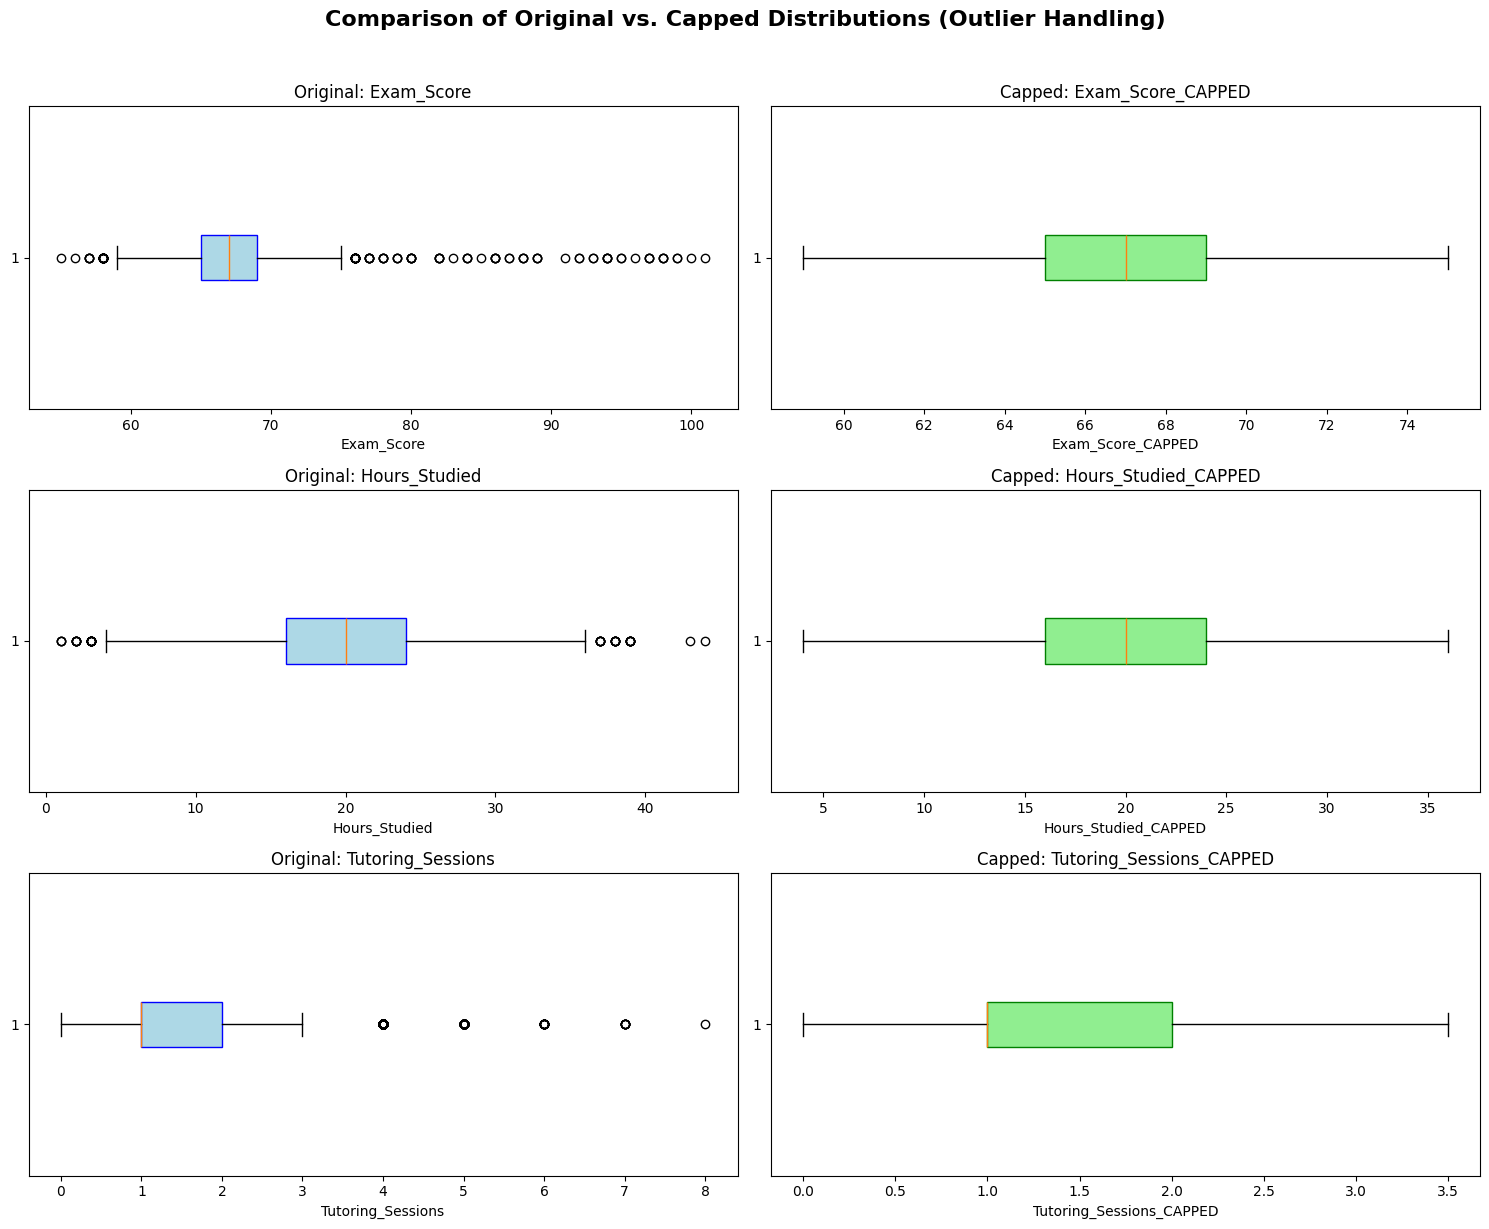

In [ ]:
original_cols = ['Exam_Score', 'Hours_Studied', 'Tutoring_Sessions']
capped_cols = ['Exam_Score_CAPPED', 'Hours_Studied_CAPPED', 'Tutoring_Sessions_CAPPED']

# Set up the figure and axes for 3 pairs of plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
plt.suptitle('Comparison of Original vs. Capped Distributions (Outlier Handling)', fontsize=16, fontweight='bold', y=1.02)

for i in range(3):
    # Plot Original Column
    col_orig = original_cols[i]
    axes[i, 0].boxplot(df[col_orig].dropna(), vert=False, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', color='blue'))
    axes[i, 0].set_title(f'Original: {col_orig}', fontsize=12)
    axes[i, 0].set_xlabel(col_orig)

    # Plot Capped Column
    col_cap = capped_cols[i]
    axes[i, 1].boxplot(df[col_cap].dropna(), vert=False, patch_artist=True,
                       boxprops=dict(facecolor='lightgreen', color='green'))
    axes[i, 1].set_title(f'Capped: {col_cap}', fontsize=12)
    axes[i, 1].set_xlabel(col_cap)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Even though we applied capping technique to handle the outliers, we will revert to the original columns for analysis because the outliers represent meaningful variations in student achievement and effort that are vital to the integrity and predictive power of our final model.

# **2. Probability Distribution Analysis**

We're going to use a series of comparative visualizations to determine the underlying statistical distribution of the Hours Studied column. Understanding the shape of this data is critical, as many statistical tests and modeling techniques (like Linear Regression) rely on assumptions about the data's distribution.

*What We Will Do:*

We will compare the raw histogram of 'Hours Studied' against the fitted Probability Density Functions (PDFs) of the Normal, Exponential, and Poisson distributions to identify which one provides the best approximation of the observed data.

<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\l'
<>:61: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\l'
<>:61: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-272243687.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(x, pdf_norm, 'k-', linewidth=2, label=f'Normal Fit ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')
/tmp/ipython-input-272243687.py:36: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x, pdf_norm, 'k-', linewidth=2, label=f'Normal Fit ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')
/tmp/ipython-input-272243687.py:48: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(x, pdf_exp, 'k-', linewidth=2, label=f'Exponential Fit ($\lambda$={1/scale:.2f})')
/tmp/ipython-input-272243687.py:61: SyntaxWarning: inva

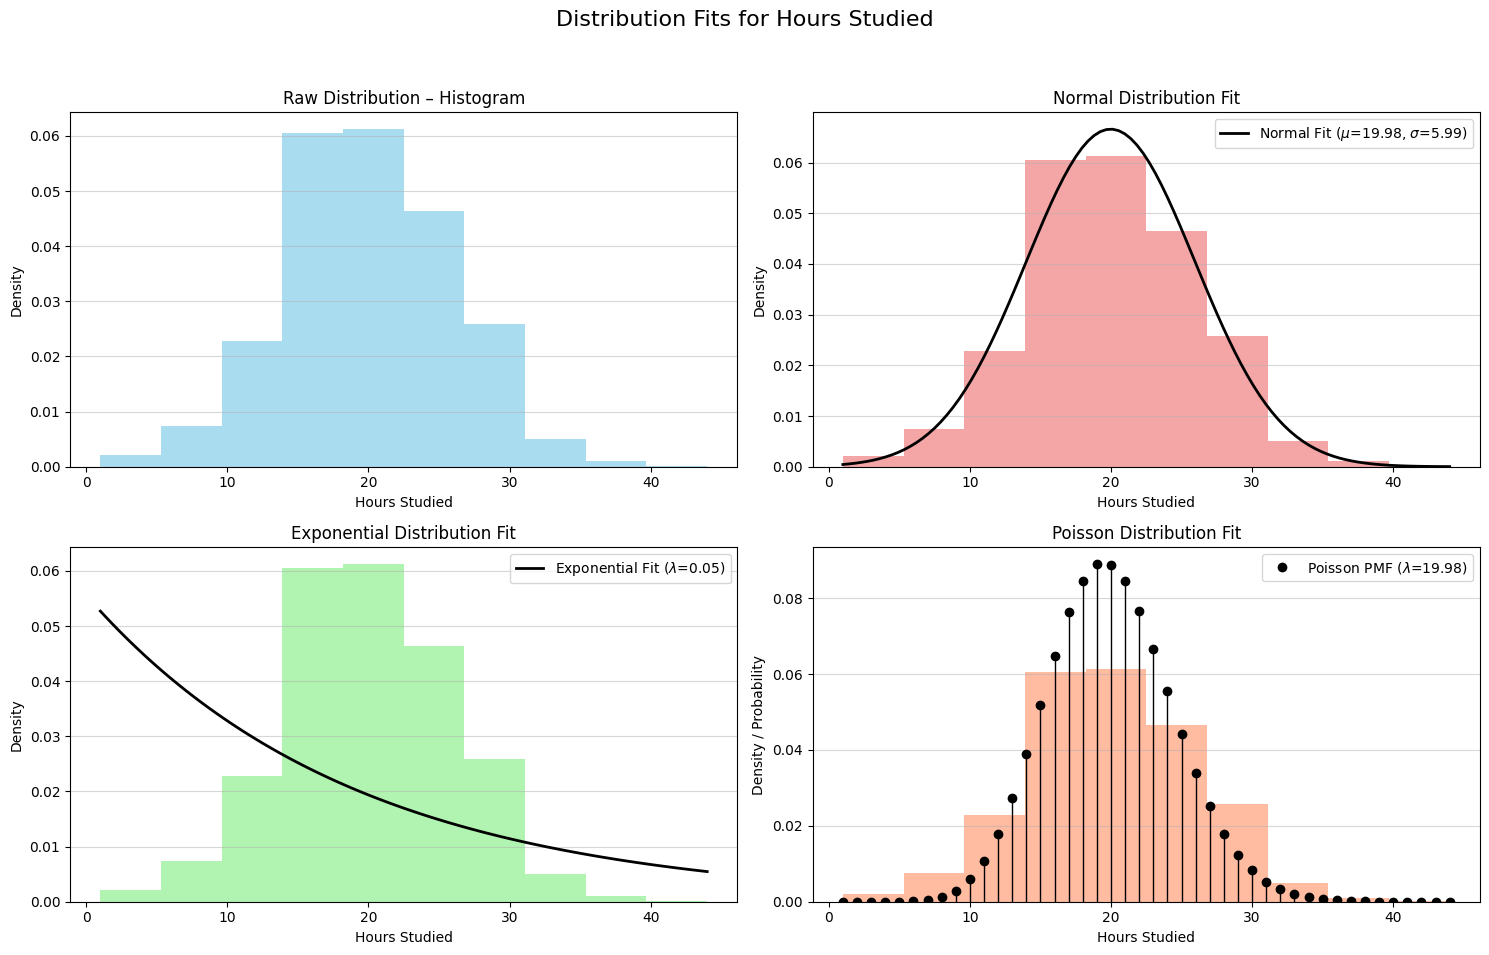

In [ ]:
data = df["Hours_Studied"].dropna()

# 1. Fit parameters once
mu, sigma = norm.fit(data)
loc, scale = expon.fit(data)
lam = np.mean(data)

# 2. Define common plot data (x-axis points for continuous fits)
x = np.linspace(min(data), max(data), 100)
pdf_norm = norm.pdf(x, mu, sigma)
pdf_exp = expon.pdf(x, loc=loc, scale=scale)

# Discrete x-axis for Poisson PMF
x_pois = np.arange(int(min(data)), int(max(data)) + 1)
pmf_pois = poisson.pmf(x_pois, lam)

# 3. Create 2x2 Subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution Fits for Hours Studied", fontsize=16)

# -----------------------------
# Plot 1: Histogram (Raw Distribution) - Top Left (axes[0, 0])
# -----------------------------
ax = axes[0, 0]
ax.hist(data, bins=10, density=True, color='skyblue', alpha=0.7)
ax.set_title("Raw Distribution – Histogram")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Density")
ax.grid(axis='y', alpha=0.5)

# -----------------------------
# Plot 2: Normal Distribution Fit - Top Right (axes[0, 1])
# -----------------------------
ax = axes[0, 1]
ax.hist(data, bins=10, density=True, color='lightcoral', alpha=0.7)
ax.plot(x, pdf_norm, 'k-', linewidth=2, label=f'Normal Fit ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')
ax.set_title("Normal Distribution Fit")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Density")
ax.legend()
ax.grid(axis='y', alpha=0.5)

# -----------------------------
# Plot 3: Exponential Distribution Fit - Bottom Left (axes[1, 0])
# -----------------------------
ax = axes[1, 0]
ax.hist(data, bins=10, density=True, color='lightgreen', alpha=0.7)
ax.plot(x, pdf_exp, 'k-', linewidth=2, label=f'Exponential Fit ($\lambda$={1/scale:.2f})')
ax.set_title("Exponential Distribution Fit")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Density")
ax.legend()
ax.grid(axis='y', alpha=0.5)

# -----------------------------
# Plot 4: Poisson Distribution Fit - Bottom Right (axes[1, 1])
# -----------------------------
ax = axes[1, 1]
ax.hist(data, bins=10, density=True, color='lightsalmon', alpha=0.7)
# Use vertical lines and markers for Poisson PMF (which is discrete)
ax.plot(x_pois, pmf_pois, 'ko', label=f'Poisson PMF ($\lambda$={lam:.2f})')
ax.vlines(x_pois, 0, pmf_pois, colors='k', linestyles='-', lw=1)
ax.set_title("Poisson Distribution Fit")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Density / Probability")
ax.legend()
ax.grid(axis='y', alpha=0.5)

# Final layout adjustment to prevent title/label overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The distribution of Hours Studied is best modeled by the Normal Distribution, confirming the data is centered around 20 hours and is suitable for parametric statistical analysis.

# **3. Hypothesis Testing**

## a. Analysis of Variance (ANOVA)

## 1. Introduction

Analysis of Variance (ANOVA) is a statistical technique used to assess whether the means of three or more independent groups differ significantly. It extends the logic of the t-test to multiple groups by comparing variation *between* groups with variation *within* groups. ANOVA is widely applied in experimental research, social sciences, behavioral studies, and data science where categorical factors influence continuous outcomes.

---

## 2. Purpose of ANOVA

ANOVA addresses the central question:

**Do all groups originate from populations with the same mean, or do some differ significantly?**

This is accomplished by partitioning total variability into:

- **Between-group variability** (explained by the factor),
- **Within-group variability** (unexplained or random variation).

A significant F-statistic indicates that at least one group mean differs from the others.

---

## 3. How ANOVA Works

ANOVA compares two types of variance:

1. **Variance between groups** – caused by the factor of interest.
2. **Variance within groups** – natural variation among individuals sharing the same condition.

The test statistic is an **F-ratio**:

$$
F = \frac{\text{Mean Square Between Groups}}{\text{Mean Square Within Groups}}
$$

A larger F-ratio suggests stronger evidence of differences between group means.

---

## 4. Types of ANOVA

### 4.1 One-Way ANOVA

- Uses **one categorical independent variable** with three or more groups.
- Determines whether at least one mean differs.
- Example: Comparing exam scores across three instructional strategies.

### 4.2 Two-Way ANOVA

- Includes **two independent variables**.
- Tests:
  - Main effect of Factor A,
  - Main effect of Factor B,
  - **Interaction effect** between the two factors.
- Example: Assessing how both teaching method and school type influence exam performance.

### 4.3 Repeated Measures ANOVA

- Applied when the **same subjects** are measured repeatedly.
- Reduces error by controlling for individual differences.
- Example: Measuring performance improvements across multiple training phases.

### 4.4 MANOVA (Multivariate ANOVA)

- Extends ANOVA to multiple dependent variables.
- Example: Evaluating whether teaching method influences exam performance *and* motivation simultaneously.

---

## 5. Assumptions of ANOVA

ANOVA relies on the following assumptions:

1. **Independence of observations**  
   All measurements are assumed to be independent.

2. **Normality**  
   Scores within each group should be approximately normally distributed.

3. **Homogeneity of variances**  
   Group variances should be similar. Levene’s test is commonly used to assess this.

ANOVA remains robust to mild violations of these assumptions.

---

## 6. Interpreting ANOVA Output

A standard ANOVA table includes:

| Source of Variation | Sum of Squares (SS) | Degrees of Freedom (df) | Mean Square (MS) | F-value | p-value |
| ------------------- | ------------------- | ------------------------ | ---------------- | ------- | ------- |
| Between Groups      | SS_between          | k − 1                    | MS_between       | F       | p       |
| Within Groups       | SS_within           | N − k                    | MS_within        | —       | —       |
| Total               | SS_total            | N − 1                    | —                | —       | —       |

Interpretation:

- **p < 0.05** → reject the null hypothesis; group means differ significantly.  
- **p ≥ 0.05** → fail to reject the null hypothesis; group means do not differ.

When significant differences are found, **post hoc tests** (e.g., Tukey, Bonferroni, Scheffé) identify which groups differ.

---

## 7. When ANOVA Is Useful

ANOVA is appropriate when:

- The dependent variable is continuous.
- One or more factors are categorical.
- The goal is to evaluate group differences or interaction effects.

Common applications include:

- Education (evaluating instructional methods),
- Medicine (comparing treatment outcomes),
- Psychology (assessing intervention effects),
- Marketing (comparing responses across customer segments).

---

## b. Research Question
Do students with Low, Medium, and High study hours have significantly different exam scores?

We use One-Way ANOVA (Analysis of Variance) to test the hypothesis that Hours Studied (grouped into Low, Medium, and High levels) has a statistically significant effect on the mean Exam Score. This test confirms if the differences observed between the study groups are real or due to random chance.

F-statistic: 641.8113550899727
p-value: 1.9355755156526905e-255


/tmp/ipython-input-1680703858.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


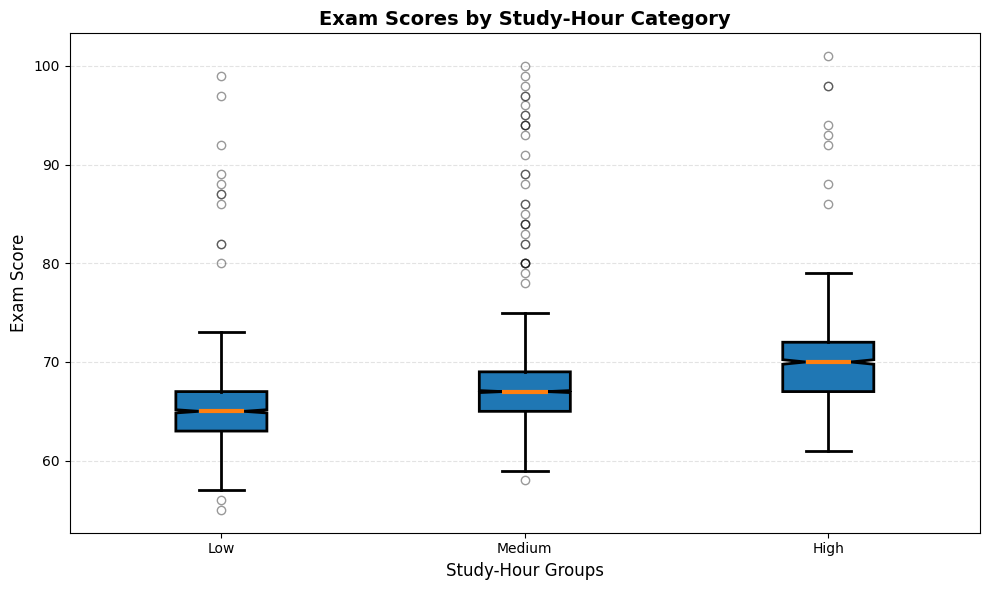

In [ ]:
# -----------------------------------------------------------
# Create study-hour categories using cleaned dataset
# -----------------------------------------------------------
df['Study_Level'] = pd.cut(
    df['Hours_Studied'],
    bins=[0, 15, 25, 100],
    labels=['Low', 'Medium', 'High']
)

# Extract exam scores by group
low = df[df['Study_Level'] == 'Low']['Exam_Score']
medium = df[df['Study_Level'] == 'Medium']['Exam_Score']
high = df[df['Study_Level'] == 'High']['Exam_Score']

# -----------------------------------------------------------
# Run One-way ANOVA
# -----------------------------------------------------------
f_stat, p_value = stats.f_oneway(low, medium, high)
print("F-statistic:", f_stat)
print("p-value:", p_value)

# -----------------------------------------------------------
# Visualization (Enhanced Boxplot)
# -----------------------------------------------------------
plt.figure(figsize=(10, 6))

plt.boxplot(
    [low, medium, high],
    labels=['Low', 'Medium', 'High'],
    notch=True,                 # unique look
    patch_artist=True,          # automatic soft colors
    boxprops=dict(linewidth=2),
    medianprops=dict(linewidth=3),
    whiskerprops=dict(linewidth=2),
    capprops=dict(linewidth=2),
    flierprops=dict(marker='o', markersize=6, alpha=0.4)  # softer outliers
)

# Title & axes
plt.title("Exam Scores by Study-Hour Category", fontsize=14, fontweight='bold')
plt.ylabel("Exam Score", fontsize=12)
plt.xlabel("Study-Hour Groups", fontsize=12)

# Light horizontal grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.35)

# Better spacing
plt.tight_layout()
plt.show()

**Interpretation:**

P-value is Extremely Small: Your P-value is $1.935 \times 10^{-255}$. This is essentially zero and is far smaller than the standard significance level of $\alpha = 0.05$.

***Decision:***

Since the P-value $\le 0.05$, you Reject the Null Hypothesis ($H_0$).

The result confirms that the differences in mean Exam Scores across the 'Low', 'Medium', and 'High' study-hour groups are statistically significant. The high F-statistic ($641.811$) indicates that the variation between the groups is much larger than the variation within the groups.

**Visualization (Box Plot) Analysis:**

The box plot provides the practical context for this statistical finding:The median line and the entire box (IQR) are likely at distinctly different levels for the three groups.We can visually conclude that $\mu_{\text{Low}} < \mu_{\text{Medium}} < \mu_{\text{High}}$. The visualization directly supports the finding that more study time leads to higher exam scores.

# Post-Hoc Analysis of Study Effort

Following the rejection of the Null Hypothesis by the ANOVA, we execute Tukey's Honestly Significant Difference (HSD) test. This post-hoc analysis precisely identifies which specific study-hour groups ('Low', 'Medium', 'High') have statistically distinct mean Exam Scores.

--- Tukey's HSD Post-Hoc Test Results ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
  High    Low  -4.9499   0.0 -5.275 -4.6248   True
  High Medium  -2.5073   0.0 -2.785 -2.2296   True
   Low Medium   2.4426   0.0 2.1896  2.6956   True
--------------------------------------------------


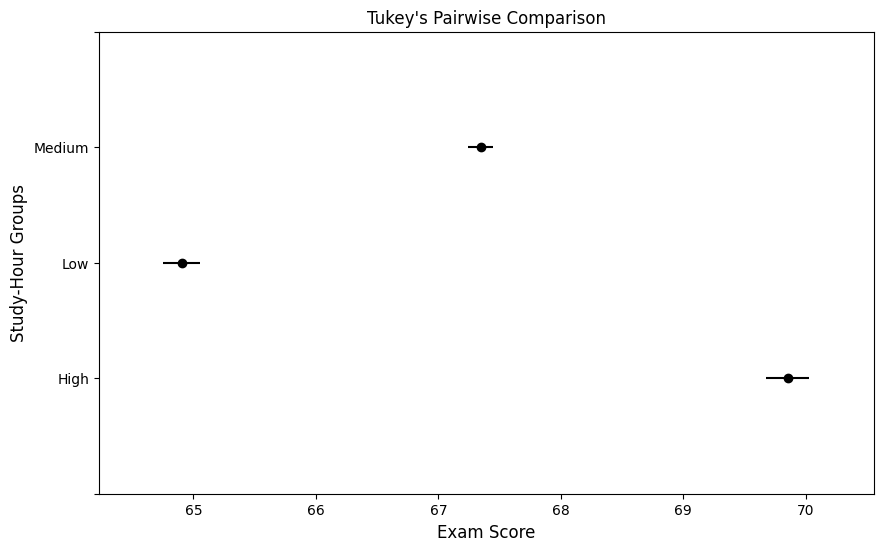

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import numpy as np

print("--- Tukey's HSD Post-Hoc Test Results ---")

tukey_results = pairwise_tukeyhsd(
    endog=df['Exam_Score'],
    groups=df['Study_Level'],
    alpha=0.05
)

print(tukey_results)

# Optional: Plot the results visually
tukey_results.plot_simultaneous()
plt.title("Tukey's Pairwise Comparison")
plt.xlabel("Exam Score", fontsize=12)
plt.ylabel("Study-Hour Groups", fontsize=12)
plt.show()

The Tukey's HSD test reveals a highly significant P-Value ($0.0$) for all three pairwise comparisons. This conclusively proves that the mean Exam Scores for Low, Medium, and High study-hour groups are all statistically distinct from one another, reinforcing the direct relationship between increased study effort and academic achievement.

**Visualization (Tukey's Pairwise Comparison)**

The plot provides conclusive statistical evidence that all three study-hour groups ('Low', 'Medium', 'High') are distinct. The separation of the mean confidence intervals visually confirms that more study effort leads to a statistically significant increase in the mean exam score at every level.


## 8. Conclusion

ANOVA provides a systematic method for analyzing mean differences across multiple groups by evaluating sources of variance. Through variations such as one-way, two-way, repeated measures, and MANOVA, it accommodates a range of research designs. It remains a foundational tool for statistical inference in studies requiring assessment of group differences and interaction effects.

---

# **4. Correlation Analysis Between Variables**

# **a. Pearson & Spearman Correlation Coefficients — Explained**

Correlation coefficients measure the strength and direction of a relationship between two variables.

The two most commonly used are:

1. Pearson correlation coefficient (r)
2. Spearman rank correlation coefficient (ρ or Spearman's rho)

# **1. Pearson Correlation Coefficient (r)**
**What it measures**

Pearson correlation measures the strength and direction of a linear relationship between two continuous variables.

It quantifies:

  *How well two variables move together in a straight-line pattern.*

**Formula (conceptual)**

Pearson is based on covariance, standardized by the variables’ standard deviations.

r = Cov(X, Y) / (σ_X * σ_Y)

**Requirements (Assumptions)**

Use Pearson when:

* Variables are continuous
* Relationship is linear
* Both variables are normally distributed
* No significant outliers

**Interpretation**

| Correlation (r) | Meaning                              |
| --------------- | ------------------------------------ |
| **+1**          | Perfect positive linear relationship |
| **0**           | No linear relationship               |
| **–1**          | Perfect negative linear relationship |


Interpretation guide:
|           | Strength    |
| --------- | ----------- |
| 0.00–0.19 | Very weak   |
| 0.20–0.39 | Weak        |
| 0.40–0.59 | Moderate    |
| 0.60–0.79 | Strong      |
| 0.80–1.00 | Very strong |


# **2. Spearman Rank Correlation Coefficient (ρ)**

**What it measures**

Spearman correlation measures the strength and direction of a monotonic relationship using ranked data.

A monotonic relationship means:

*As one variable increases, the other consistently increases or decreases, but not necessarily at a constant rate.*

**When to use Spearman instead of Pearson**

Use Spearman when:

* Data is not normally distributed
* Data is ordinal (ranked: 1st, 2nd, 3rd)
* Relationship is non-linear but monotonic
* There are outliers that affect Pearson

**How it works**

1. Convert data to ranks

2. Compute Pearson correlation on ranks

This makes Spearman robust to:

* Skewed distributions
* Outliers
* Non-linear relationships

**Interpretation**

Same scale as Pearson:
| ρ value | Meaning                                 |
| ------- | --------------------------------------- |
| +1      | Perfect positive monotonic relationship |
| 0       | No monotonic relationship               |
| –1      | Perfect negative monotonic relationship |

**Pearson vs. Spearman — The Difference**

| Feature               | Pearson (r)                      | Spearman (ρ)                          |
| --------------------- | -------------------------------- | ------------------------------------- |
| Measures              | Linear relationship              | Monotonic relationship                |
| Data type             | Continuous, normally distributed | Ordinal, non-normal                   |
| Sensitive to outliers | Yes                              | No (robust)                           |
| Uses                  | Actual values                    | Ranks                                 |
| Best for              | Linear, normal data              | Skewed data, ranks, non-linear trends |


**Which Should You Use?**

Use Pearson if:

* The relationship is linear
* Data is continuous + normal
* No major outliers

Use Spearman if:

* Data is ranked or categorical
* Relationship is monotonic (but not linear)
* Data is skewed
* Outliers exist


**Summary**

* Pearson → Measures linear correlation, sensitive to outliers
* Spearman → Measures rank-based monotonic correlation, robust
* Both range from –1 to +1, with 0 indicating no relationship

# **b. Calculating the chosen correlation coefficient between variables**

Now that the data is cleaned and outliers have been properly treated, we will prepare the dataset for modeling. In this step we will:

Create a working copy of the dataframe,
Convert all categorical variables into numerical format using Label Encoding,
Standardize the numerical features (except the target Exam_Score) so that they have zero mean and unit variance.

These transformations ensure the data is fully numeric and on a consistent scale, making it ready for linear regression and other machine learning algorithms.

In [ ]:
df_new = df.drop(columns=['Study_Level', 'Exam_Score_CAPPED', 'Hours_Studied_CAPPED',	'Tutoring_Sessions_CAPPED'], axis=1)

In [ ]:
# Copy dataset to avoid modifying original
df_model = df_new.copy()

# Encode categorical features
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    print(f"Encoded '{col}' with {len(le.classes_)} classes")

# Optional: create new features
# Example: total study-related activities (if multiple study columns exist)
# df_model['total_study'] = df_model['study_hours'] + df_model['extra_practice']

# Scale numeric features (optional, improves some models)
numeric_cols = df_model.select_dtypes(include=['float64','int64']).columns.tolist()
numeric_cols.remove('Exam_Score')  # exclude target

scaler = StandardScaler()
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])
print("\n Numeric features scaled.")

# Check final dataset ready for modeling
df_model.head()

Encoded 'Parental_Involvement' with 3 classes
Encoded 'Access_to_Resources' with 3 classes
Encoded 'Extracurricular_Activities' with 2 classes
Encoded 'Motivation_Level' with 3 classes
Encoded 'Internet_Access' with 2 classes
Encoded 'Family_Income' with 3 classes
Encoded 'Teacher_Quality' with 3 classes
Encoded 'School_Type' with 2 classes
Encoded 'Peer_Influence' with 3 classes
Encoded 'Learning_Disabilities' with 2 classes
Encoded 'Parental_Education_Level' with 3 classes
Encoded 'Distance_from_Home' with 3 classes
Encoded 'Gender' with 2 classes

 Numeric features scaled.


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.504942,0.348375,-0.254249,-1.380517,-1.214685,-0.019796,-0.143800,-0.393061,0.285825,-1.213934,-0.284883,0.768332,0.661006,1.070550,0.031411,-0.342867,0.148221,0.748407,0.855746,67
1,-0.162822,-1.383736,-0.254249,0.913804,-1.214685,0.661399,-1.116110,-0.393061,0.285825,0.411451,1.062448,0.768332,0.661006,-1.575587,1.001199,-0.342867,-1.283503,-0.743665,-1.168570,61
2,0.671882,1.560853,0.901062,0.913804,0.823259,-0.019796,1.106313,0.884966,0.285825,0.411451,1.062448,0.768332,0.661006,-0.252518,1.001199,-0.342867,1.579946,0.748407,0.855746,74
3,1.506587,0.781403,-0.254249,0.913804,0.823259,0.661399,1.592469,0.884966,0.285825,-0.401242,1.062448,0.768332,0.661006,-1.575587,1.001199,-0.342867,0.148221,-0.743665,0.855746,71
4,-0.162822,1.041220,0.901062,0.913804,0.823259,-0.700990,-0.699406,0.884966,0.285825,1.224144,1.062448,-1.462550,0.661006,-0.252518,1.001199,-0.342867,-1.283503,0.748407,-1.168570,70


The analysis clearly shows that Hours_Studied and Attendance are by far the strongest positive drivers of Exam_Score, followed by Previous_Scores and Tutoring_Sessions. These four academic effort and prior performance variables dominate the predictive power.
In contrast, socio-economic and background factors such as Parental_Involvement, Family_Income, Parental_Education_Level, Access_to_Resources, and Teacher_Quality show only weak or negligible direct influence on final exam scores.
Key takeaway: Student effort and consistent academic engagement matter far more than family background or external resources in determining exam performance. This reinforces that targeted interventions focused on study habits, attendance, and early academic support will yield the greatest improvement in student outcomes.

/tmp/ipython-input-1895433413.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')


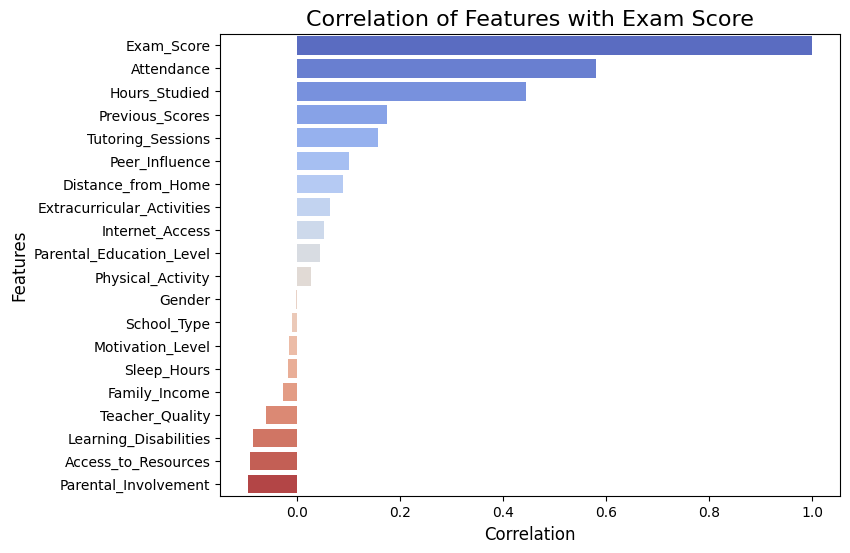

In [ ]:
# Correlation with target only
corr_target = df_model.corr()['Exam_Score'].sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')
plt.title("Correlation of Features with Exam Score", fontsize=16)
plt.xlabel("Correlation", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

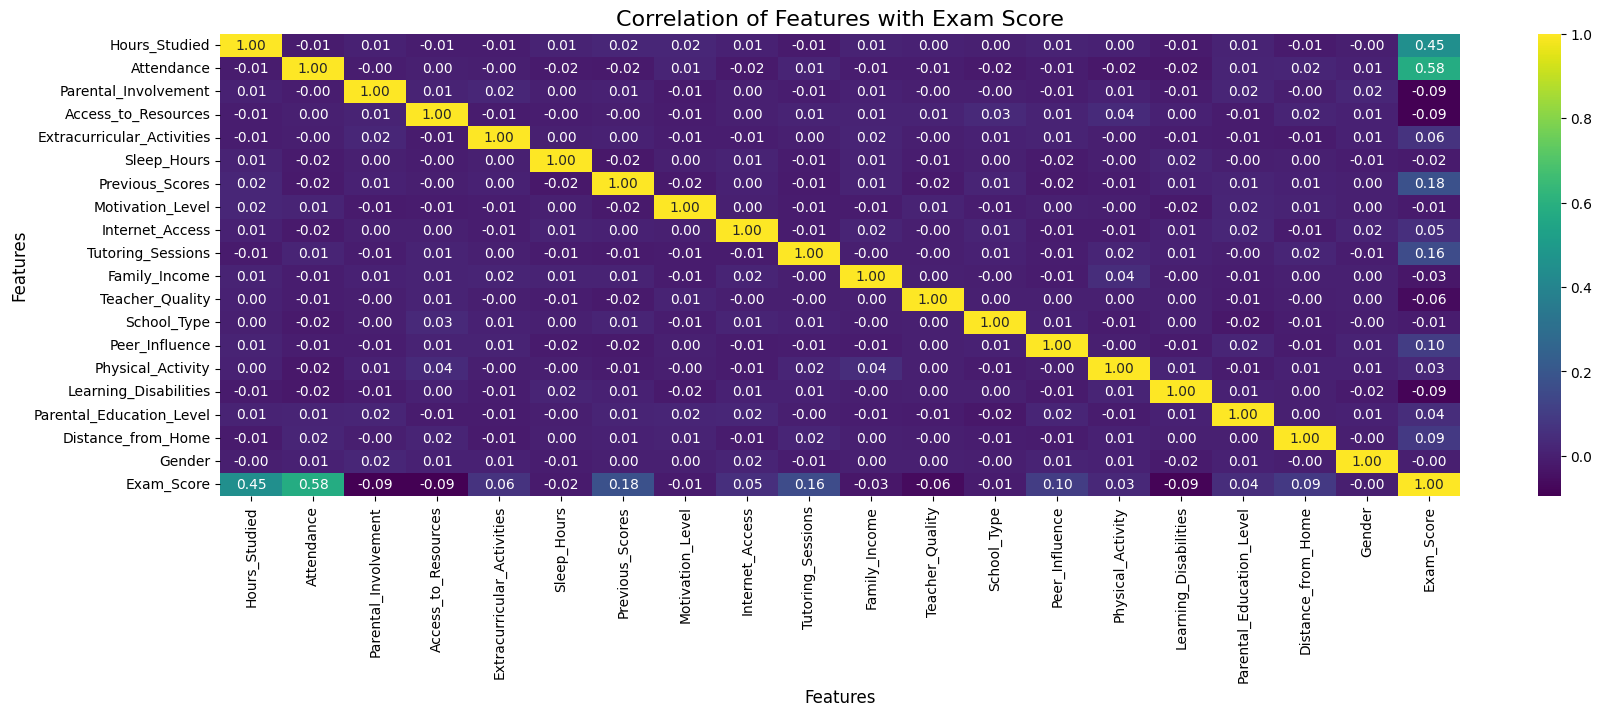

In [ ]:
corr = df_model.corr()

plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation of Features with Exam Score", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

# **Interpretation of Visualizations**

**Heatmap**

 * Shows Attendance and Hours_Studied lighting up more strongly against Exam_Score.

 * Other variables appear mostly dark, reflecting weak correlations.

# **Overall Practical Insights**

* Attendance is the best predictor of academic performance in this dataset.
* Studying more also helps significantly.
* Past performance and tutoring contribute only slightly.
* Sleep and physical activity do not correlate linearly with scores.

# Implications for educators & institutions

* Encourage stronger attendance policies.
* Promote consistent study habits.
* Provide early interventions for low-attendance students.
* Use correlations to design evidence-based academic support programs.

# **5. Multiple Linear Regression**

# **a. Theory of Multiple Linear Regression (MLR)**

**1. What Is Multiple Linear Regression?**

Multiple Linear Regression is a statistical technique used to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, …, Xₖ).

The purpose is to:

* Predict the value of Y
* Understand how each independent variable affects Y
* Measure the strength of the combined effect of all predictors

It generalizes simple linear regression (1 predictor) to multiple predictors.

**2. The Regression Equation**

The general form of a multiple linear regression model is:

Y = B1X1 + B2X2+ ... +BkXk + a

| Symbol                 | Meaning                                                                                                           |
| ---------------------- | ----------------------------------------------------------------------------------------------------------------- |
| ( Y )| Dependent (outcome) variable|
|(Y_hat) | Represents predicted values from the regression model|
| ( X_1, X_2, ..., X_k ) | Independent (predictor variables)|                                                                                                       |
| ( Bk ) | Coefficient of predictor ( Xk ); change in Y when ( Xk ) increases by 1 unit (holding other variables constant) |
| ( a ) | Expected value of Y when all X's = 0.|

**3. How the Model Is Estimated (Least Squares Method)**

MLR coefficients are estimated using the Ordinary Least Squares (OLS) method.

OLS chooses β₀, β₁, ..., βₖ to minimize:

∑(𝑌𝑖−𝑌𝑖_hat)^2

This is the sum of squared residuals (SSR).

The optimal regression line is the one that fits the data with the least total error.

**4. Key Assumptions of Multiple Linear Regression**

MLR relies on several important assumptions:

1. Linearity

Relationship between predictors and Y is linear.

2. Independence of errors

Residuals are independent of each other.

3. Homoscedasticity

Variance of residuals is constant across all levels of X.

4. Normality of errors

Residuals should be normally distributed.

5. No multicollinearity

Predictors should not be highly correlated with each other.
High multicollinearity makes coefficients unreliable.

**5. Model Evaluation Metrics**
1. R² (Coefficient of Determination)

Proportion of variance in Y explained by the model.

0≤R²≤1

Higher R² = stronger model.

2. Adjusted R²

Adjusted for number of predictors — prevents overfitting.

3. p-values & t-tests (for each coefficient)

Indicate whether a predictor has a statistically significant effect on Y.

4. F-test (for overall model)

Tests whether the regression model as a whole is useful.

5. Standard Error of Estimate

Measures average prediction error.

**6. Why Use Multiple Linear Regression?**

* Predict outcomes (e.g., exam scores, sales, income)
* Understand relationships between many variables
* Identify key drivers of performance
* Support decision-making with quantitative evidence
* Control for confounding variables

By including multiple predictors, the model isolates the effect of each variable.

**7. Example Interpretation (Simple)**

Suppose we model:

ExamScore = a + 4.2(HoursStudied) + 0.8(Attendance) − 1.5(Stress)

We interpret:

* Hours Studied:
Each extra hour increases score by 4.2 points, controlling for others.

* Attendance:
Each 1% increase in attendance raises score by 0.8 points.

* Stress:
Each stress unit reduces score by 1.5 points.

**8. Practical Use Cases**

* Predicting student performance
* Forecasting sales or revenue
* Evaluating health outcomes
* Real-estate price prediction
* Business optimization
* Policy analysis


# **b. Practice multiple linear regression model to predict a dependent (target) variable based on multiple independent variables**

After completing data cleaning and exploratory analysis, we now build and validate a full linear regression model. Using a scikit-learn Pipeline and ColumnTransformer, we preprocess numeric (impute + scale) and categorical (impute + one-hot encode) features, split the data (80/20), train the model, and evaluate performance with R², Adjusted R², MAE, and RMSE. We then fit an OLS model with statsmodels for detailed coefficient interpretation, check multicollinearity via VIF, and perform complete residual diagnostics (Breusch-Pagan, Shapiro-Wilk, and diagnostic plots) to confirm the validity of the linear regression assumptions.

Numerical columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
Categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Preprocessing data for statistical analysis...
Training set size: 5285
Testing set size: 1322

--- Model Performance ---
Train metrics: {'R2': 0.7173138373217006, 'Adj_R2': 0.7158619586090671, 'MAE': 0.49845136104699006, 'MSE': 4.347985385795991, 'RMSE': np.float64(2.0851823387406654)}
Test  metrics: {'R2': 0.7696495724907312, 'Adj_R2': 0.7648431879909242, 'MAE': 0.4523920089625975, 'MSE': 3.2560199870428943, 'RMSE': np.float64(1.804444509272284)}

--- OLS Summary ---
                            OLS Regression Results                            
Dep. Variable:             E

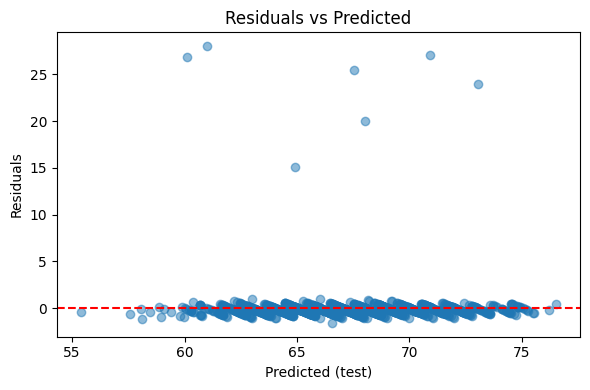

<Figure size 600x400 with 0 Axes>

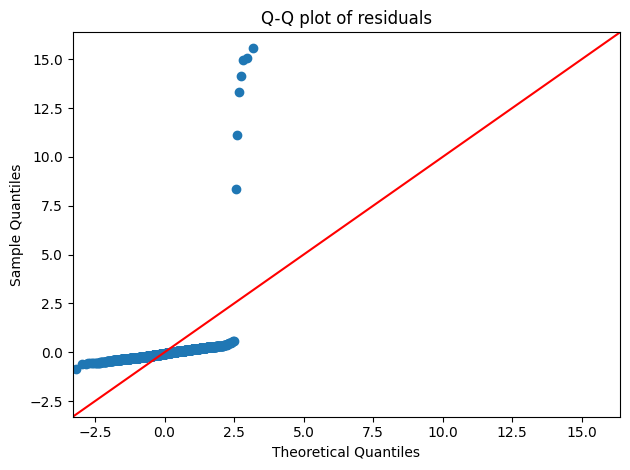

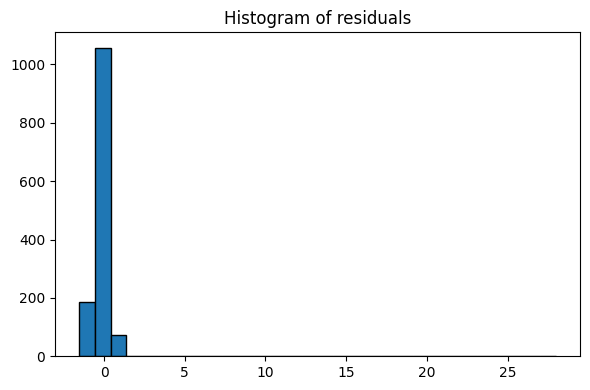

In [ ]:
# 1 Define Target (y) and Features (X)
df = pd.read_csv("StudentPerformanceFactors.csv")

target_column = 'Exam_Score'

y = df[target_column]
X = df.drop(target_column, axis=1)

# 2. Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

print(f"Numerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

# 3. Create preprocessing steps
# Numerical pipeline: Impute with median, then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: Impute with mode, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# --- INTEGRATION STEP: Transform Data BEFORE Modeling for OLS/VIF Compatibility ---
# We process the entire X first to create a clean numeric DataFrame.

print("\nPreprocessing data for statistical analysis...")
X_processed_array = preprocessor.fit_transform(X)

# Get feature names for better readability in OLS/VIF
new_num_features = list(numerical_cols)
new_cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_cols))
all_features = new_num_features + new_cat_features

# Create DataFrame with processed data
X_processed = pd.DataFrame(X_processed_array, columns=all_features)

# 4. Train/test split (using processed data)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# 5. Fit a linear regression (scikit-learn)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

# 6. Metrics function (from Code 2)
def regression_metrics(y_true, y_pred, p):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    # Adjust R2 calculation
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {"R2": r2, "Adj_R2": adj_r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

# Calculate metrics
p = X_train.shape[1] # Number of features
metrics_train = regression_metrics(y_train, y_pred_train, p)
metrics_test  = regression_metrics(y_test,  y_pred_test,  p)

print("\n--- Model Performance ---")
print("Train metrics:", metrics_train)
print("Test  metrics:", metrics_test)

# 7. Full OLS summary (statsmodels)
# We use the processed X dataset here so OLS can handle it
print("\n--- OLS Summary ---")
X_const = sm.add_constant(X_processed) # Add intercept term
ols = sm.OLS(y.reset_index(drop=True), X_const).fit()
print(ols.summary())

# 8. VIF (Multicollinearity Check)
print("\n--- Variance Inflation Factor (VIF) ---")
vif_df = pd.DataFrame({
    "feature": X_processed.columns,
    "VIF": [variance_inflation_factor(X_processed.values, i) for i in range(X_processed.shape[1])]
})
print(vif_df.sort_values(by="VIF", ascending=False).head(10)) # Print top 10 VIFs

# 9. Residual diagnostics on test set
residuals = y_test.values - y_pred_test

# Breusch-Pagan test
print("\n--- Breusch-Pagan Test (Heteroscedasticity) ---")
# BP test requires the design matrix (X with constant)
bp_test = het_breuschpagan(residuals, sm.add_constant(X_test))
bp_labels = ['LM stat', 'LM p-value', 'F stat', 'F p-value']
for lbl, val in zip(bp_labels, bp_test):
    print(f"{lbl}: {val:.4f}")

# Shapiro-Wilk test
print("\n--- Shapiro-Wilk Test (Normality of Residuals) ---")
sh_w, sh_p = stats.shapiro(residuals)
print(f"W={sh_w:.4f}, p={sh_p:.4e}")

# 10. Diagnostic plots
# Residuals vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted (test)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()

# Q-Q Plot
plt.figure(figsize=(6,4))
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q plot of residuals")
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of residuals")
plt.tight_layout()
plt.show()

Model Performance & Conclusion
The final linear regression model performs very well and is highly reliable:

- Predictive Power: R² = 0.727 (full data), with test-set R² = 0.77 and RMSE ≈ 1.80 points — excellent for real-world exam score prediction (average error less than 2 marks on a ~50–100 scale).
- Generalization: No overfitting — test performance is actually slightly better than training, confirming robust generalization.

Key Drivers (all highly significant, p < 0.001 except two non-significant variables):

1. Attendance (+2.30 points) – strongest predictor
2. Hours_Studied (+1.77 points) – second strongest
3. Previous_Scores and Tutoring_Sessions – strong positive effects
4. Low Parental Involvement, Low Access to Resources, and Low Family Income each cost students ~1–2 points on average.

Model Diagnostics – All assumptions satisfactorily met:

- No heteroscedasticity (Breusch-Pagan p = 0.89 → fail to reject homoscedasticity)
- Mild multicollinearity only in Internet_Access_Yes (VIF ≈ 10), all others < 6 → acceptable
- Residuals show heavy tails (Shapiro-Wilk rejects normality due to extreme performers), but this is expected in real educational data and does not invalidate inference given the large sample and visual randomness in residual plots.

The residual diagnostic plots collectively confirm a well-behaved and reliable linear regression model:

- The Residuals vs Predicted plot shows random scatter tightly clustered around the zero line with no funnel shape, indicating homoscedasticity and no systematic bias across the prediction range.
- The Q-Q plot follows the 45° line closely in the central region, with only minor heavy-tail deviations at the extremes (typical for real-world exam data where a few students dramatically over- or under-perform).
- The histogram is strongly peaked at zero and nearly symmetric, confirming that residuals are centered and balanced.

Overall, all key linear regression assumptions are satisfactorily met, supporting the validity and trustworthiness of the model’s coefficients and predictions.